In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import yfinance as yf
import datetime

In [62]:
def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(month=month, day=day, year=year)

In [63]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [64]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1253   2016-12-23
1254   2016-12-27
1255   2016-12-28
1256   2016-12-29
1257   2016-12-30
Name: Date, Length: 1258, dtype: datetime64[ns]

In [65]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [71]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,3:4].values

In [72]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [73]:
X_train = []
y_train = []

for i in range (10,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-10:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [74]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train

array([[[0.40001392],
        [0.40665027],
        [0.38520976],
        ...,
        [0.31724522],
        [0.30647856],
        [0.31478559]],

       [[0.40665027],
        [0.38520976],
        [0.36439577],
        ...,
        [0.30647856],
        [0.31478559],
        [0.32480973]],

       [[0.38520976],
        [0.36439577],
        [0.30063115],
        ...,
        [0.31478559],
        [0.32480973],
        [0.34021719]],

       ...,

       [[0.70749025],
        [0.70974104],
        [0.71155096],
        ...,
        [0.69625951],
        [0.69312697],
        [0.69693243]],

       [[0.70974104],
        [0.71155096],
        [0.69519213],
        ...,
        [0.69312697],
        [0.69693243],
        [0.68184982]],

       [[0.71155096],
        [0.69519213],
        [0.70308149],
        ...,
        [0.69693243],
        [0.68184982],
        [0.67660572]]])

In [75]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

# New Section

In [76]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
36/36 - 6s - loss: 0.0411 - 6s/epoch - 162ms/step
Epoch 2/20
36/36 - 1s - loss: 0.0081 - 814ms/epoch - 23ms/step
Epoch 3/20
36/36 - 1s - loss: 0.0074 - 865ms/epoch - 24ms/step
Epoch 4/20
36/36 - 1s - loss: 0.0071 - 856ms/epoch - 24ms/step
Epoch 5/20
36/36 - 1s - loss: 0.0076 - 857ms/epoch - 24ms/step
Epoch 6/20
36/36 - 1s - loss: 0.0070 - 852ms/epoch - 24ms/step
Epoch 7/20
36/36 - 1s - loss: 0.0070 - 919ms/epoch - 26ms/step
Epoch 8/20
36/36 - 1s - loss: 0.0068 - 915ms/epoch - 25ms/step
Epoch 9/20
36/36 - 1s - loss: 0.0072 - 886ms/epoch - 25ms/step
Epoch 10/20
36/36 - 1s - loss: 0.0075 - 888ms/epoch - 25ms/step
Epoch 11/20
36/36 - 1s - loss: 0.0075 - 869ms/epoch - 24ms/step
Epoch 12/20
36/36 - 1s - loss: 0.0055 - 890ms/epoch - 25ms/step
Epoch 13/20
36/36 - 1s - loss: 0.0060 - 860ms/epoch - 24ms/step
Epoch 14/20
36/36 - 1s - loss: 0.0056 - 838ms/epoch - 23ms/step
Epoch 15/20
36/36 - 1s - loss: 0.0048 - 858ms/epoch - 24ms/step
Epoch 16/20
36/36 - 1s - loss: 0.0065 - 870ms/epoch

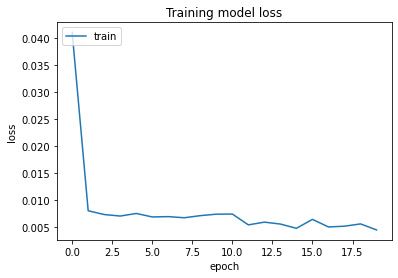

In [96]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [97]:
def str_to_datetime1(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(month=month, day=day, year=year)

In [98]:
testData = pd.read_csv('Google_test_data.csv')

In [99]:
testData['Date'] = testData['Date'].apply(str_to_datetime1)
testData['Date']

0     2018-08-13
1     2018-08-14
2     2018-08-15
3     2018-08-16
4     2018-08-17
         ...    
247   2019-08-07
248   2019-08-08
249   2019-08-09
250   2019-08-12
251   2019-08-13
Name: Date, Length: 252, dtype: datetime64[ns]

In [100]:
testData.index = testData.pop('Date')
testData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...
2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700


In [101]:
testData.shift(periods=-10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-13,1227.599976,1243.089966,1225.715942,1241.819946,1241.819946,1156300.0
2018-08-14,1241.290039,1242.545044,1228.689941,1231.150024,1231.150024,1304000.0
2018-08-15,1237.449951,1250.660034,1236.359009,1249.300049,1249.300049,1298900.0
2018-08-16,1244.229980,1253.635010,1232.589966,1239.119995,1239.119995,1331400.0
2018-08-17,1234.979980,1238.660034,1211.285034,1218.189941,1218.189941,1816400.0
...,...,...,...,...,...,...
2019-08-07,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-09,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,3:4]
y_test = testData.iloc[10:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 10
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test.shape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(242, 10, 1)

In [103]:
X_test

array([[[1.72593747],
        [1.74238903],
        [1.67806758],
        ...,
        [1.66170864],
        [1.65718397],
        [1.69261654]],

       [[1.74238903],
        [1.67806758],
        [1.65975958],
        ...,
        [1.65718397],
        [1.69261654],
        [1.74173925]],

       [[1.67806758],
        [1.65975958],
        [1.6469277 ],
        ...,
        [1.69261654],
        [1.74173925],
        [1.71698075]],

       ...,

       [[1.7616717 ],
        [1.73614729],
        [1.70303512],
        ...,
        [1.57497204],
        [1.58434655],
        [1.65583824]],

       [[1.73614729],
        [1.70303512],
        [1.68340462],
        ...,
        [1.58434655],
        [1.65583824],
        [1.61687862]],

       [[1.70303512],
        [1.68340462],
        [1.66560704],
        ...,
        [1.65583824],
        [1.61687862],
        [1.58601717]]])

In [104]:
y_pred = model.predict(X_test)
y_pred

8/8 [==============================] - 0s 8ms/step


array([[1.5568672],
       [1.5646088],
       [1.5741836],
       [1.5857335],
       [1.595373 ],
       [1.5983843],
       [1.5923754],
       [1.5790809],
       [1.5605483],
       [1.5400923],
       [1.5215055],
       [1.5093473],
       [1.5007182],
       [1.4969682],
       [1.4961644],
       [1.4938805],
       [1.4906827],
       [1.4891099],
       [1.492076 ],
       [1.494684 ],
       [1.4968882],
       [1.5005474],
       [1.5042963],
       [1.5100803],
       [1.5166644],
       [1.5229658],
       [1.5290474],
       [1.534882 ],
       [1.5339919],
       [1.5254278],
       [1.5113152],
       [1.4940649],
       [1.4668747],
       [1.4343015],
       [1.4079531],
       [1.3883046],
       [1.3803262],
       [1.3808013],
       [1.3804164],
       [1.3785604],
       [1.3765849],
       [1.375724 ],
       [1.3661889],
       [1.3574193],
       [1.3487339],
       [1.3313227],
       [1.3106602],
       [1.2980921],
       [1.2940882],
       [1.2945101],


In [105]:
predicted_price = sc.inverse_transform(y_pred)

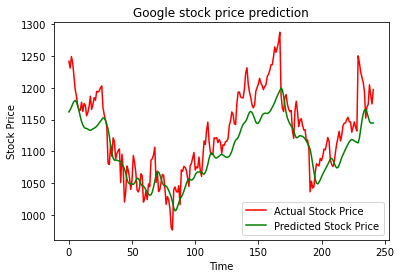

In [114]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()